# Import Libraries

In [2]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load and Check your Data

In [2]:
#Loading the dataset
mushroom_data = pd.read_csv('/Users/Bonner/Desktop/Data sets/mushrooms.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA


In [3]:
## gives information about the data types,columns and null values.
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [4]:
## Statistical details about the data 
diabetes_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [72]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### After careful observatiom, its clear that the following columns have invalid zero values:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### We'll replace the invalid zero values with NaN 

In [73]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of NaNs
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### To fill these NaN values the data distribution needs to be understood, the histograms below will visualize our data

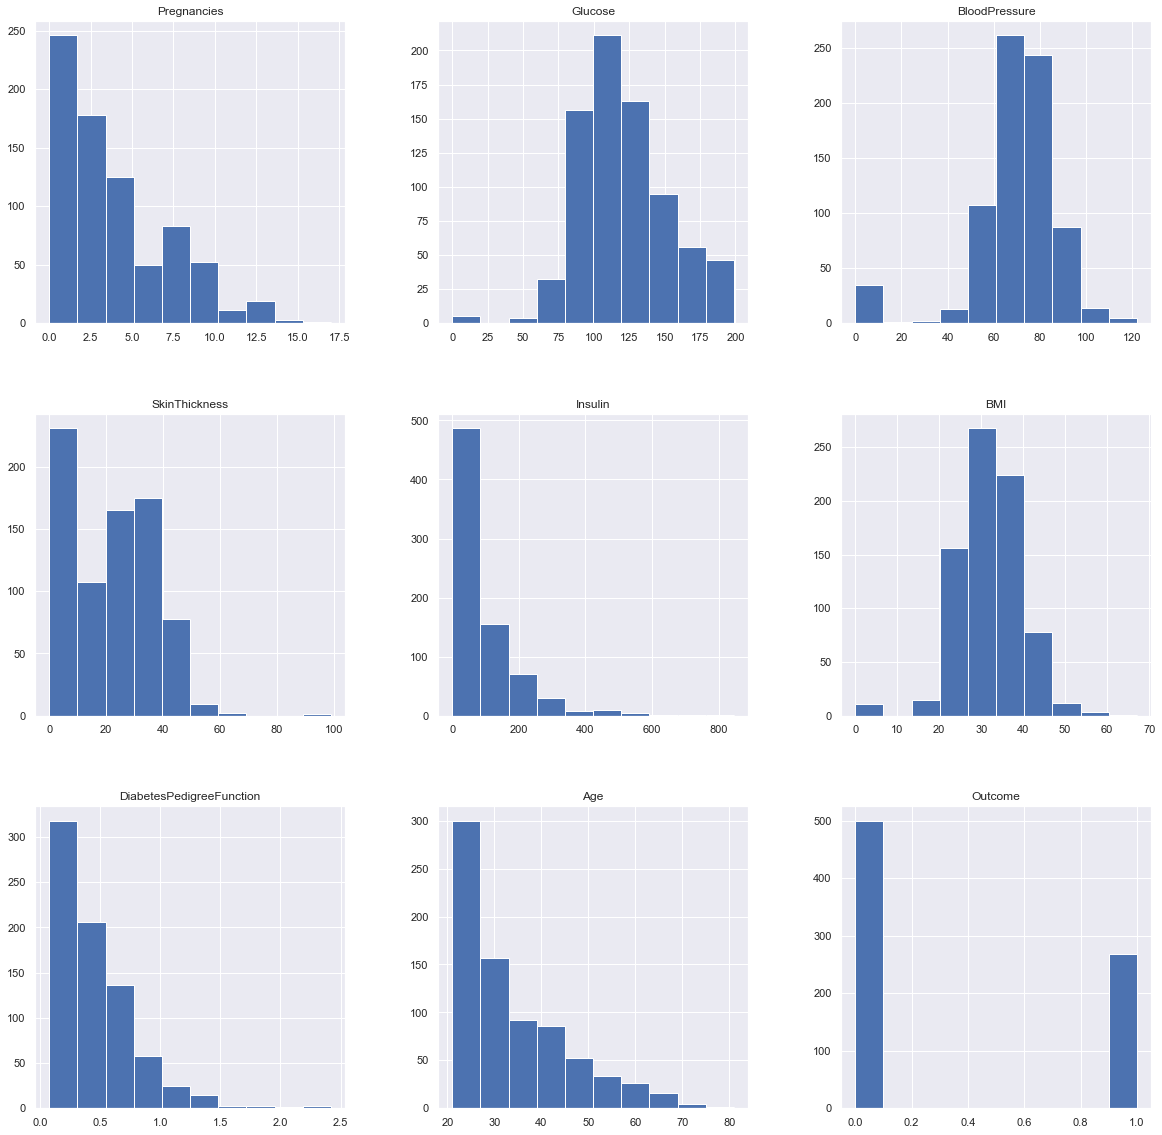

In [10]:
p = diabetes_data.hist(figsize = (20,20))

### We'll impute the NaN values below

In [11]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## Histogram Plot after removal 

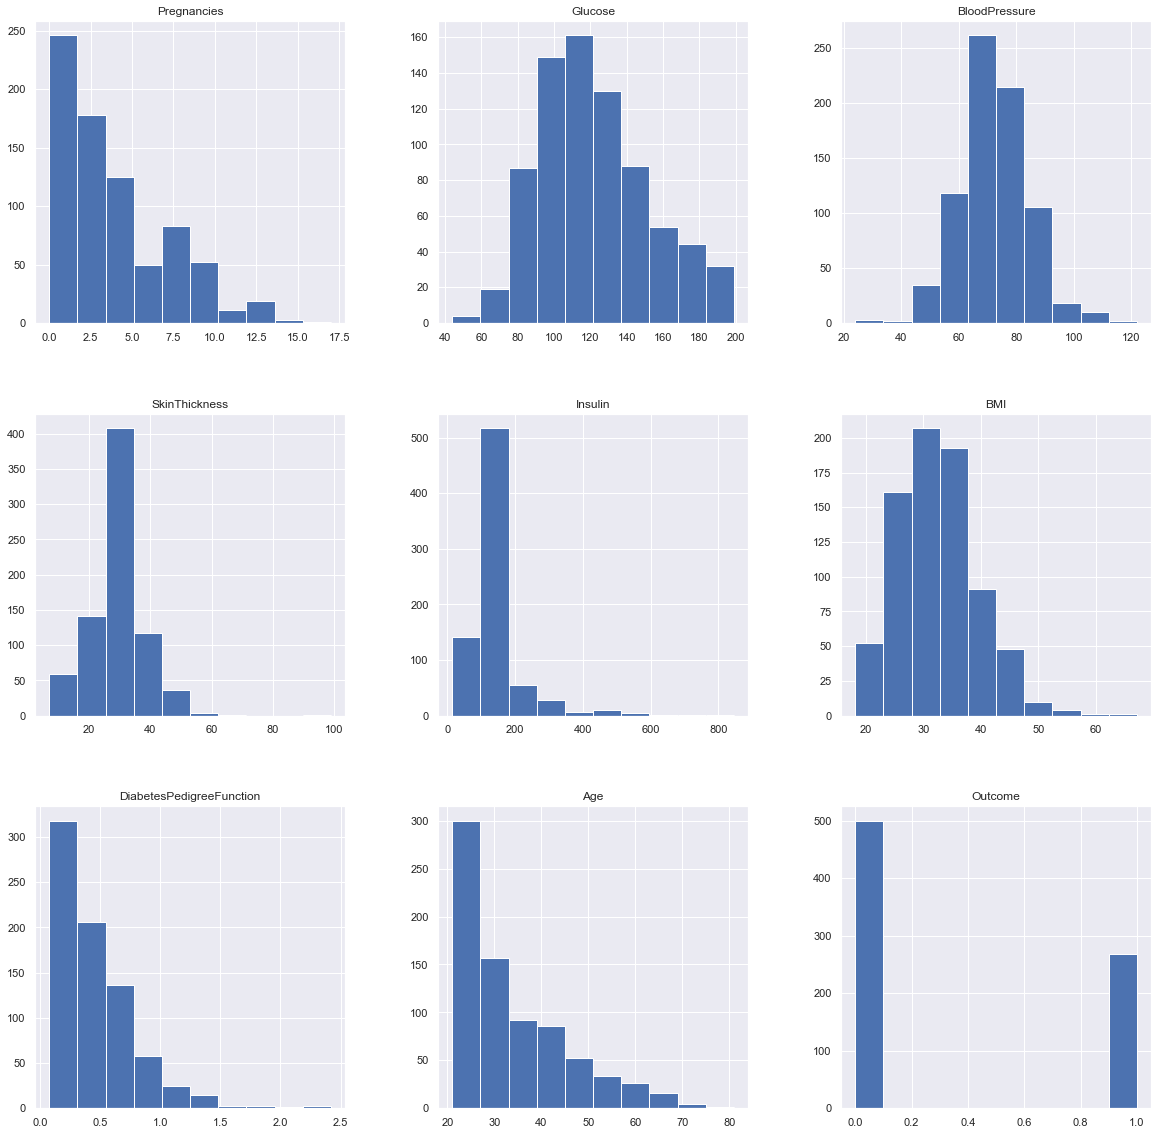

In [12]:
p = diabetes_data_copy.hist(figsize = (20,20))

## Skewd Distribution

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.assetinsights.net/Concepts/Curves_Modal_Left_and_Right.JPG)

In [13]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

In [87]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

TypeError: data type 'Pregnancies' not understood

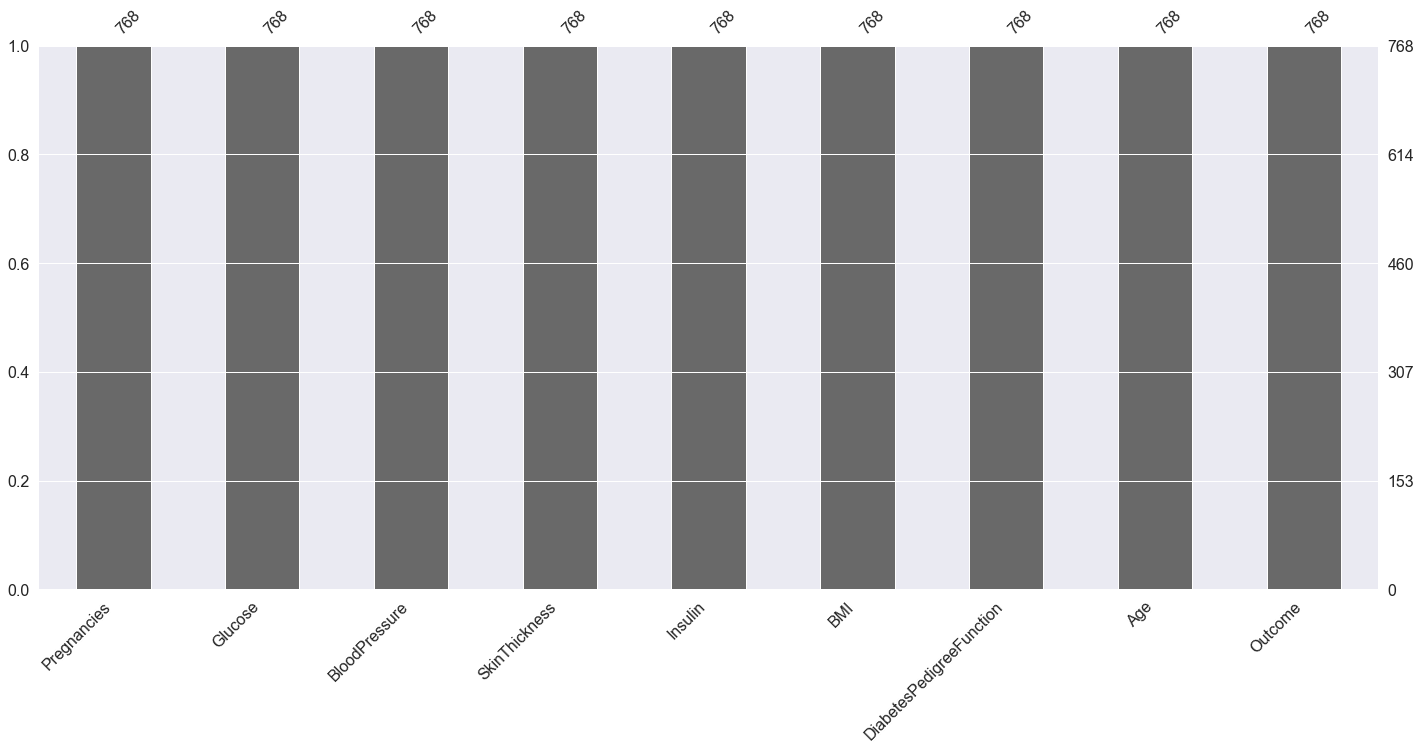

In [33]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)


0    500
1    268
Name: Outcome, dtype: int64


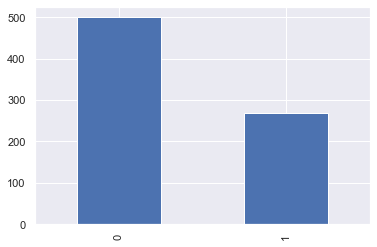

In [30]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Scatter matrix of uncleaned data

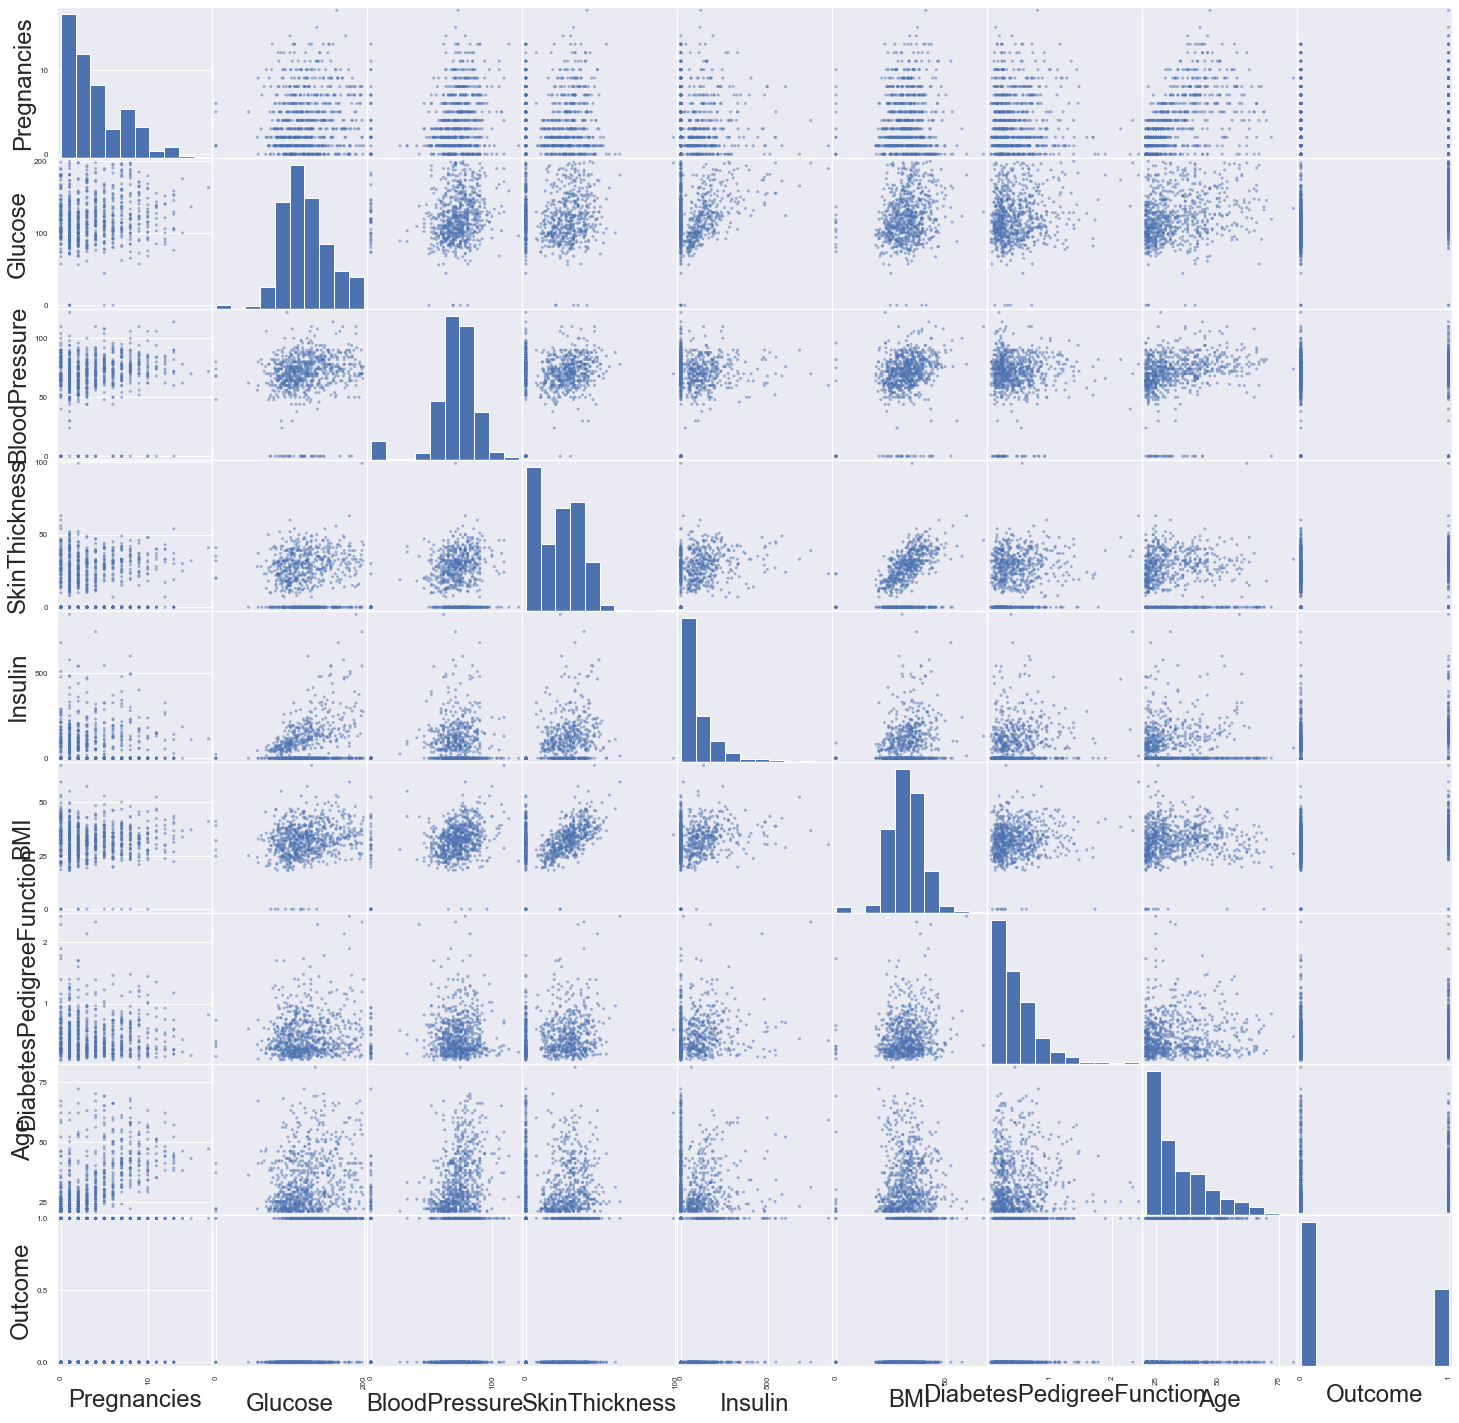

In [41]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

###### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

#### Pair plot for clean data

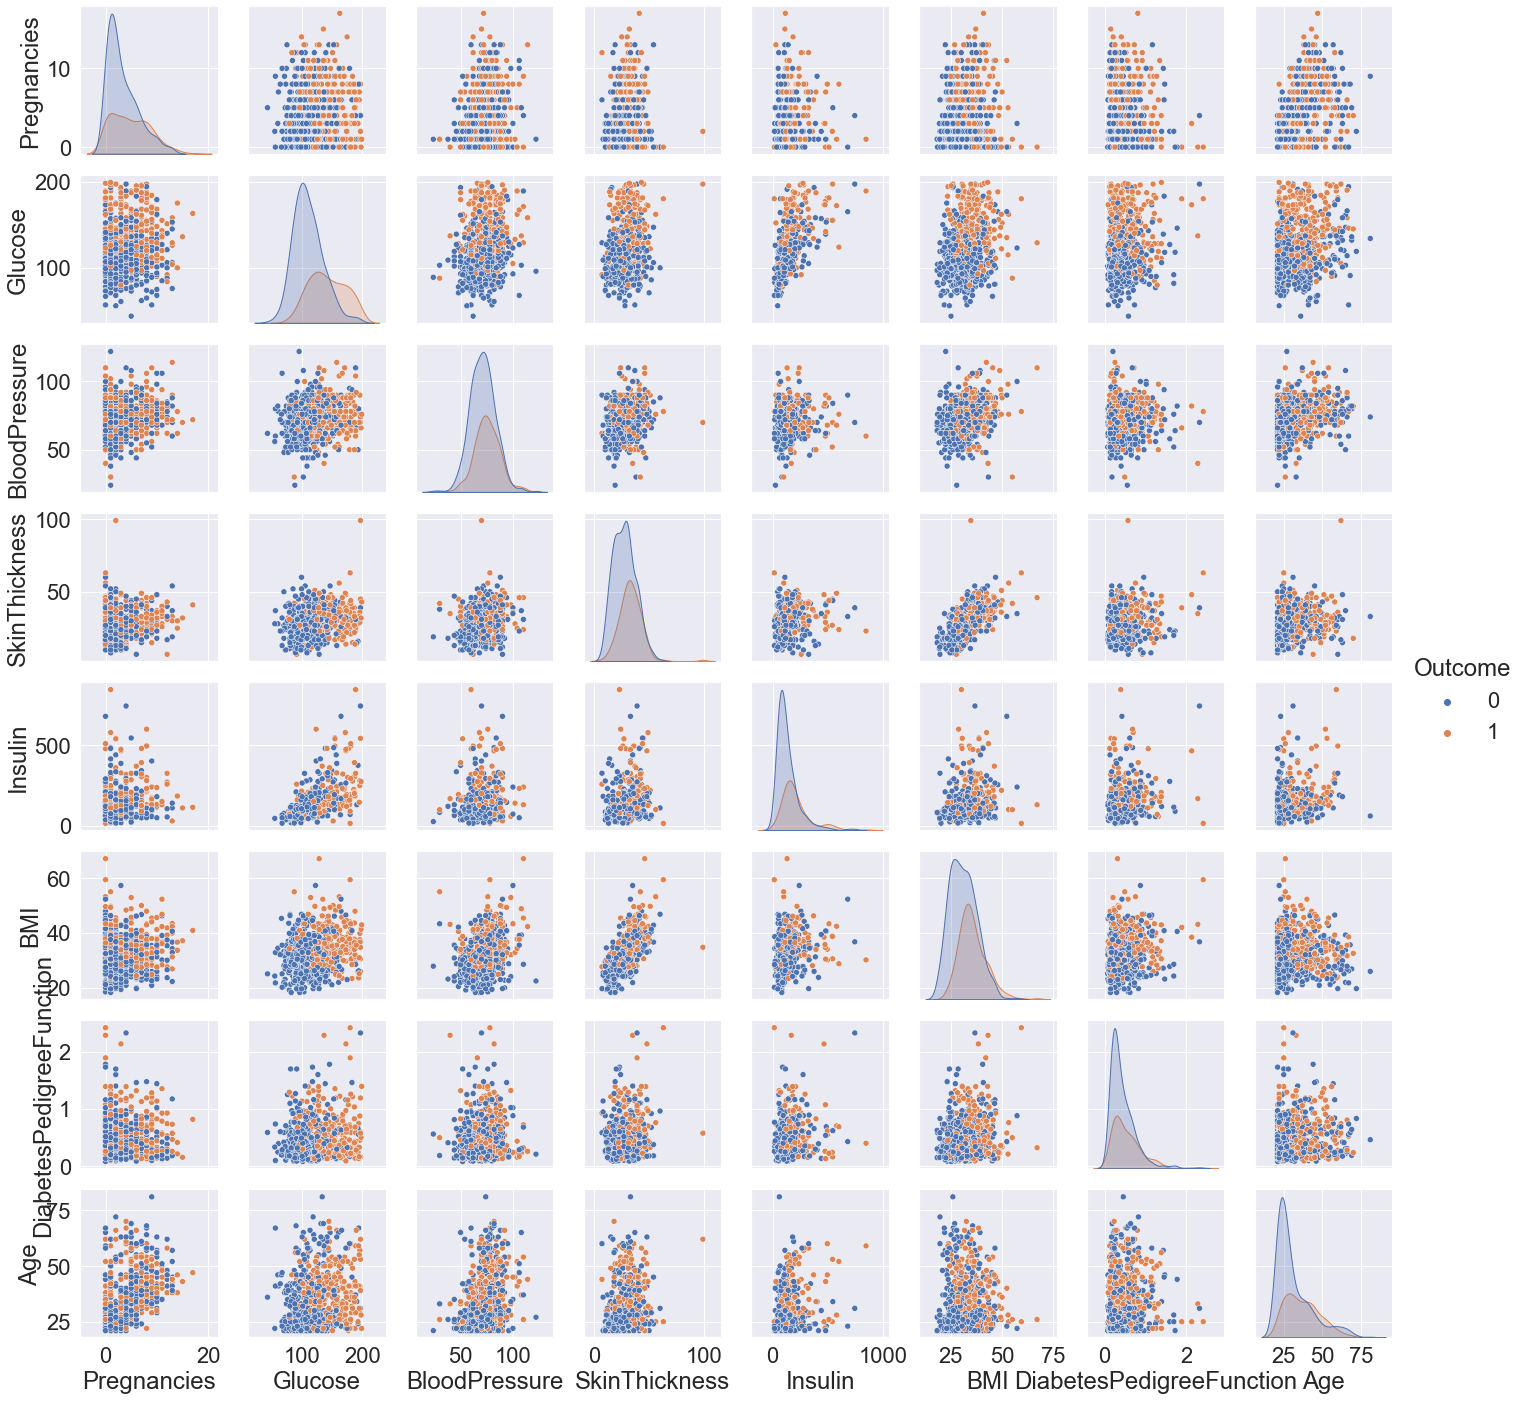

In [42]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#### Heatmap for unclean data

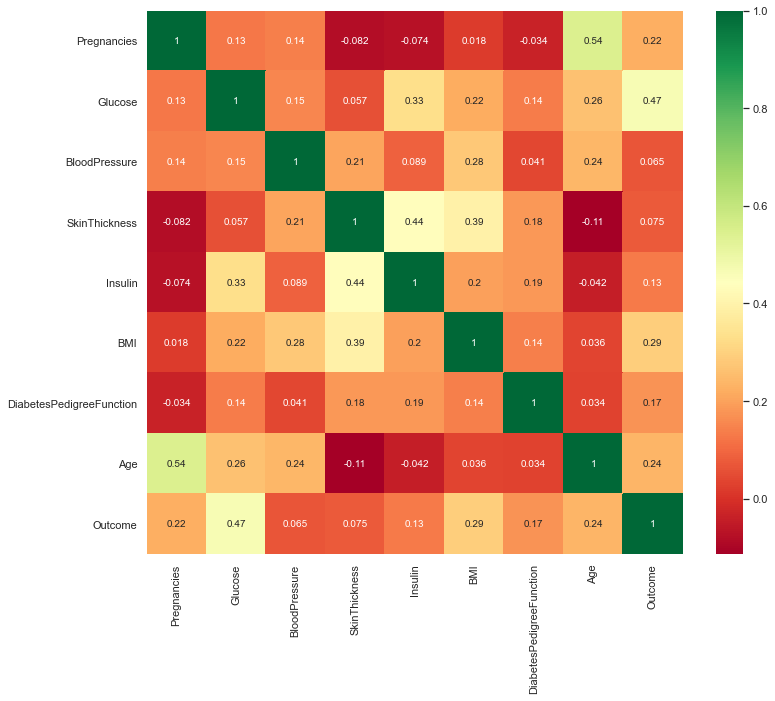

In [78]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

#### Heatmap for clean data

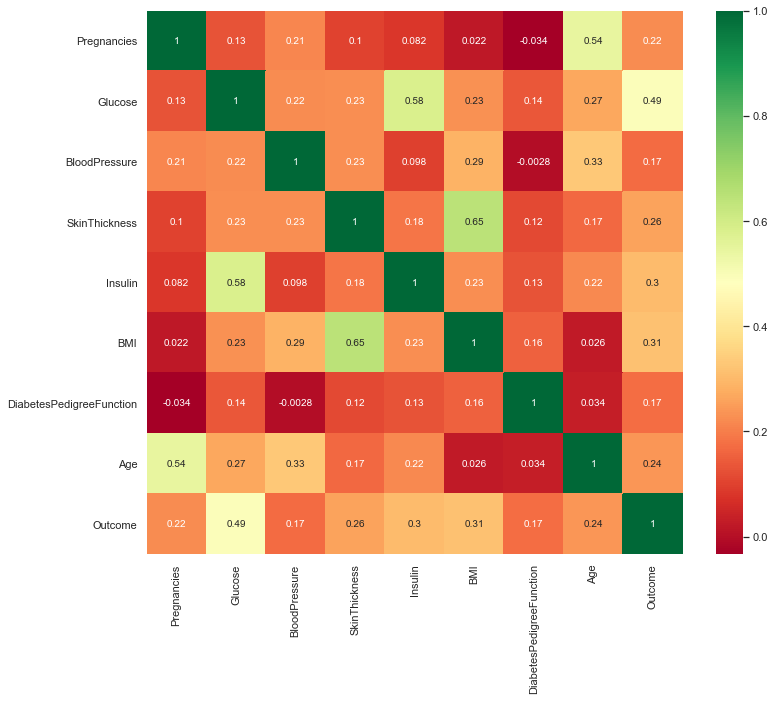

In [79]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## Scaling the data 
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)


In [50]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [51]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


In [52]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

### Why Scaling the data for KNN?

#### it is always advisable to bring all the features to the same scale when you are applying a distance based algorithm like KNN.


## Test Train Split and Cross Validation methods



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)


***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [65]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [57]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

ValueError: max() arg is an empty sequence

In [58]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

ValueError: max() arg is an empty sequence

## Result Visualisation

In [59]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

ValueError: arrays must all be same length

<Figure size 864x360 with 0 Axes>

#### The best result is captured at k = 11 hence 11 is used for the final model

In [60]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
## trying to plot decision boundary 

In [ ]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

# Model Performance Analysis

## 1. Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

![](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)

For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

Report which includes Precision, Recall and F1-Score.


#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall. 
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        
> > ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
> > 
> > Precision = TP/TP+FP
> > 
> > ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
> > 
> > Recall = TP/TP+FN
> > 
> > ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
> > 
> > F1 Score = 2*(Recall * Precision) / (Recall + Precision)
        
        
For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
                        : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

## 3. ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two


Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

# Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. 

Let’s consider the following example: 

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid. 

Suppose, you defined the grid as:
a1 = [0,1,2,3,4,5]
a2 = [10,20,30,40,5,60]
a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [80]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').